## Homework 3

You will have to submit the following two completed ipython notebooks for this homework.

1. PCA_analysis
2. Reconstruction

In [2]:
%pylab inline
data_dir = "../../Data/Weather/"

Populating the interactive namespace from numpy and matplotlib


### Downloading Pickled data from S3
If `STAT.pickle` is not in the directory, get it using the following command

In [10]:
!curl -o $data_dir/STAT.pickle http://mas-dse-open.s3.amazonaws.com/Weather/STAT.pickle

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 77.8M  100 77.8M    0     0  8165k      0  0:00:09  0:00:09 --:--:-- 7734k


### Get the statistics from the Pickle File

In [3]:
import pickle
STAT,STAT_description=pickle.load(open(data_dir+'/STAT.pickle','r'))

In [4]:
STAT.keys()

['TMIN', 'TOBS', 'TMAX', 'SNOW', 'SNWD', 'PRCP']

In [5]:
STAT_description

[('SortedVals',
  'Sample of values',
  'vector whose length varies between measurements'),
 ('UnDef',
  'sample of number of undefs per row',
  'vector whose length varies between measurements'),
 ('mean', 'mean value', ()),
 ('std', 'std', ()),
 ('low100', 'bottom 1%', ()),
 ('high100', 'top 1%', ()),
 ('low1000', 'bottom 0.1%', ()),
 ('high1000', 'top 0.1%', ()),
 ('E', 'Sum of values per day', (365,)),
 ('NE', 'count of values per day', (365,)),
 ('Mean', 'E/NE', (365,)),
 ('O', 'Sum of outer products', (365, 365)),
 ('NO', 'counts for outer products', (365, 365)),
 ('Cov', 'O/NO', (365, 365)),
 ('Var', 'The variance per day = diagonal of Cov', (365,)),
 ('eigval', 'PCA eigen-values', (365,)),
 ('eigvec', 'PCA eigen-vectors', (365, 365))]

In [6]:
Scalars=['mean','std','low1000','low100','high100','high1000']
for meas in STAT.keys():
    !grep $meas '../../Data/Weather/ghcnd-readme.txt'
    S=STAT[meas]
    for scalar in Scalars:
        print '%s:%f'%(scalar,S[scalar]),
    print

           TMIN = Minimum temperature (tenths of degrees C)
mean:44.531018 std:109.933072 low1000:-350.000000 low100:-245.000000 high100:239.000000 high1000:278.000000
 	   TOBS = Temperature at the time of observation (tenths of degrees C)
mean:113.582223 std:119.255224 low1000:-267.000000 low100:-167.000000 high100:339.000000 high1000:389.000000
           TMAX = Maximum temperature (tenths of degrees C)
mean:175.823101 std:123.742076 low1000:-233.000000 low100:-122.000000 high100:383.000000 high1000:433.000000
   	   SNOW = Snowfall (mm)
mean:2.126900 std:24.160393 low1000:0.000000 low100:0.000000 high100:76.000000 high1000:254.000000
	   SNWD = Snow depth (mm)
mean:21.454498 std:123.727039 low1000:0.000000 low100:0.000000 high100:508.000000 high1000:1676.000000
           PRCP = Precipitation (tenths of mm)
mean:24.277398 std:100.174134 low1000:0.000000 low100:0.000000 high100:356.000000 high1000:830.000000


### Script for plotting yearly plots 

In [7]:
def YearlyPlots(T,ttl='',yl='',xl='',y=None,x=None,size=(10,7), c=None):
    yearday=[i for i in range(1,366)]
    fig=figure(1,figsize=size,dpi=300)
    if shape(T)[0] != 365:
        raise ValueError("First dimension of T should be 365. Shape(T)="+str(shape(T)))
    if c is not None:
        plot_date(yearday,T, '-',color=c);
    else:
        plot_date(yearday,T, '-', );
    # rotate and align the tick labels so they look better
    #fig.autofmt_xdate()
    plt.gca().xaxis.set_major_formatter(DateFormatter('%b'))
    ylabel(yl)
    xlabel(xl)
    if y is not None:
        ylim(y)
    if x is not None:
        xlim(x)
    grid()
    title(ttl)

### Plot the following 3 plots for each measurement:

1. A histogram from the sample values (from SortedVals) restricted between low100 and high100 (By which we mean that any value larger or equal to low100 and smaller or equal to high100 is included).
2. Plot of mean and mean $\pm$ std
3. Number of measurements recorded each day

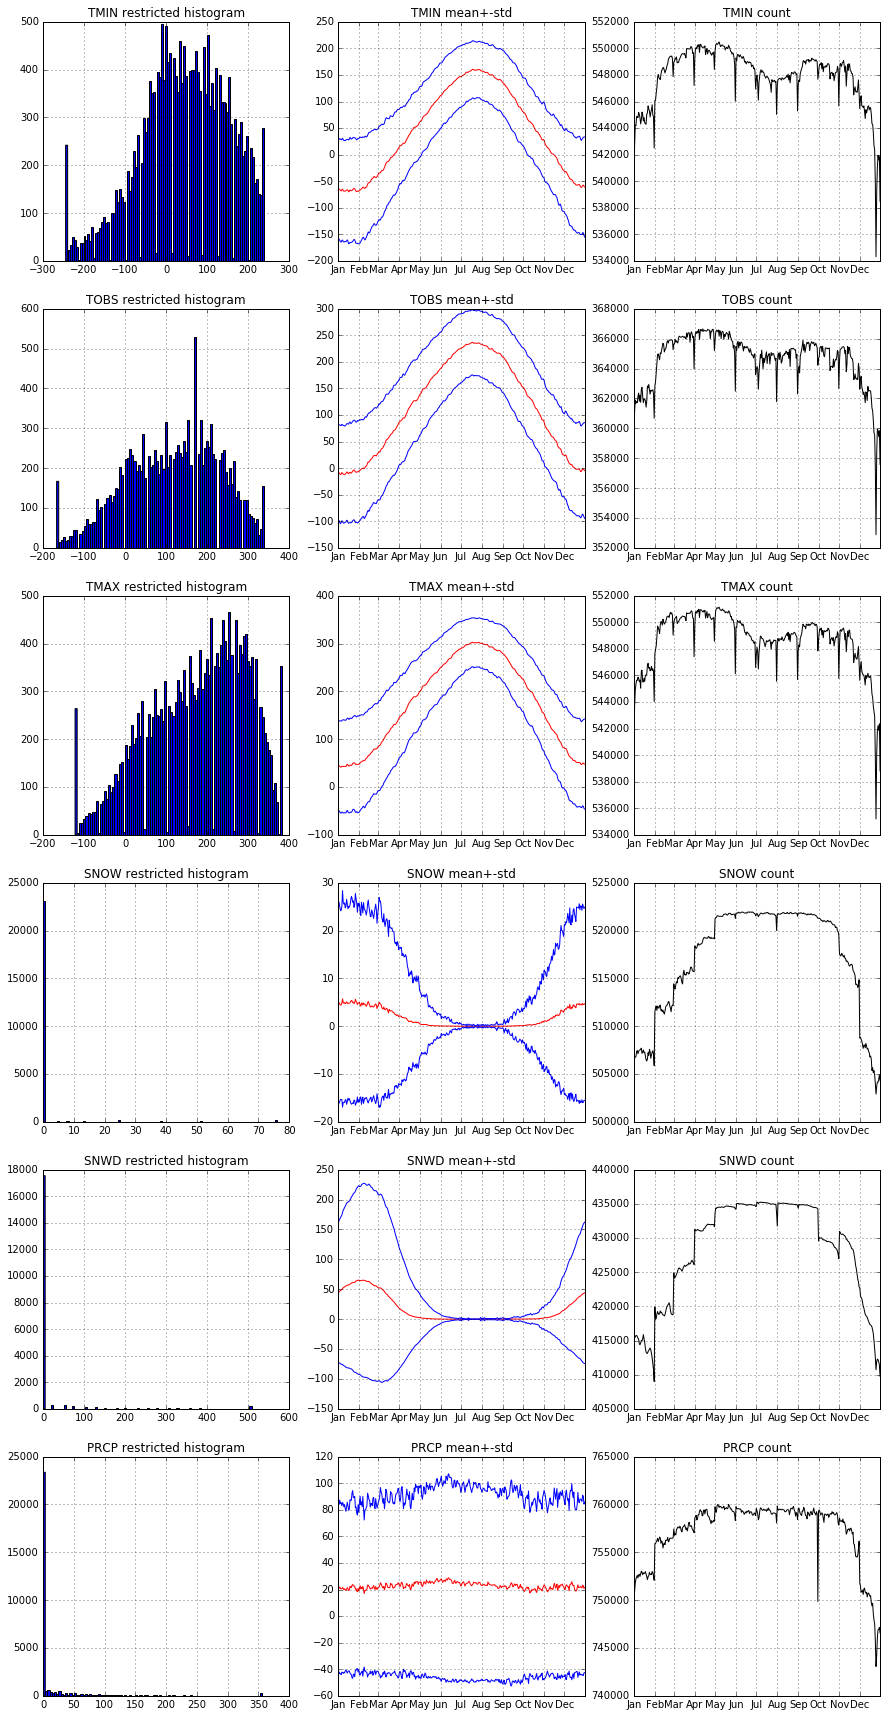

In [8]:
figure(figsize=(15,30))
offset=1
for meas in STAT.keys():
    subplot(6,3,offset)
    offset+=1
    ## Your code for Histogram
    plt.hist(np.clip(STAT[meas]['SortedVals'], STAT[meas]['low100'],STAT[meas]['high100']), bins=100)
    plt.title(meas+' restricted histogram')
    plt.grid()
    subplot(6,3,offset)
    offset+=1
    ## Your code for mean and mean +- std
    YearlyPlots(STAT[meas]['Mean'],ttl=meas+' mean+-std',yl='',xl='',y=None,x=None,size=(10,7), c='red')
    YearlyPlots(STAT[meas]['Mean']+sqrt(STAT[meas]['Var']),ttl=meas+' mean+-std',yl='',xl='',y=None,x=None,size=(10,7), c='blue')
    YearlyPlots(STAT[meas]['Mean']-sqrt(STAT[meas]['Var']),ttl=meas+' mean+-std',yl='',xl='',y=None,x=None,size=(10,7), c='blue')
    subplot(6,3,offset)
    offset+=1
    ## Your code for number of measurements
    YearlyPlots(STAT[meas]['NE'],ttl=meas+' count',yl='',xl='',y=None,x=None,size=(10,7), c='black')


### Plot the Number of measurements recorded each day for TMAX

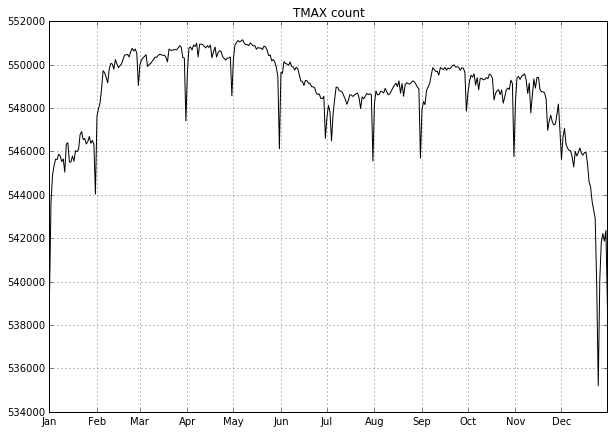

In [9]:
## Your code here
YearlyPlots(STAT['TMAX']['NE'],ttl='TMAX count',yl='',xl='',y=None,x=None,size=(10,7), c='black')

### Extra Credit
* Can you figure out what is the reason for these lower counts (especially at the beginning and end of the year and also the sudden dip at the end of each month)? Is it restricted to a subset of the stations? Suggest a way to remove this effect.

* Can you Explain the counts per day for "SNWD" ?

Provide your explanation in new markdown cells appended after this cell. Support your explanation
using code cells and graphs. If you need more data that is available only in the full dataset in the cloud but not in the data you have downloaded, contact your TA.


1. The dips are not specific to set of stations as we can see the same type of dips at the end of the year and month in the average counts per day for all picked stations. (demonstrated below) So the dips at the beginining and end of the year could be very well due to holidays and less measurement taken. The end of month dips also could be due to measurement sensor maintanence or the stations schedule of measurements.

2. one way to alleviate these dips are to interpolate the measurements before and after the dips. This can be meaningful as usually there is no sharp change of weather and it usually happens gradually.

3. The counts per dat for SNWD seems to be the highest between May and October. So this suggests that the picked stations have winter in this time frame which points to the fact that the picked stations are from the sothern hemisphere where they experience winter and cold in this time frame of May-October.

### Instructor comments

* You state that "The dips are not specific to set of stations" but the evidence you give for it is flawed. Even if the set of stations with these dips is small, the average over all stations will show them. The fluctuations are mostly in the range of 27.0 to 27.4 which is consistent with a small set of bad stations.

* A better way to test this hypohtesis is to sort all stations according to the fraction of measurements that are missing, and then see what happends to the average if the top X stations in this list are removed.

* Hypotheses 2,3 are potentially interesting, but you did not suggest a way to test them.

Extra credit 10 points.

In [10]:
# getting the data for the stations from the other HW to see if we can find the same trend (dips) in each station's data
import pickle
import pandas as pd
Data=pickle.load(open('../../Data/Weather/SampleStations.pickle','r'))
STAT,STAT_description=pickle.load(open('../../Data/Weather/STAT.pickle','r'))

FlatData=[]
for station in Data:
    stationname=station[0]
    for measurements in station[1]:
        measurement,year=measurements[0]
        yeardata=list(measurements[1])
        rowData=[stationname]+[measurement]+[year]+yeardata
        FlatData.append(rowData)
        
frameheader=['station','measurement','year']+range(1,366)
df=pd.DataFrame(FlatData,columns=frameheader)

m_df={}
for m in ['TMIN', 'TOBS', 'TMAX', 'SNOW', 'SNWD', 'PRCP']:
    t_df=df[df['measurement']==m]
    m_df[m]=t_df

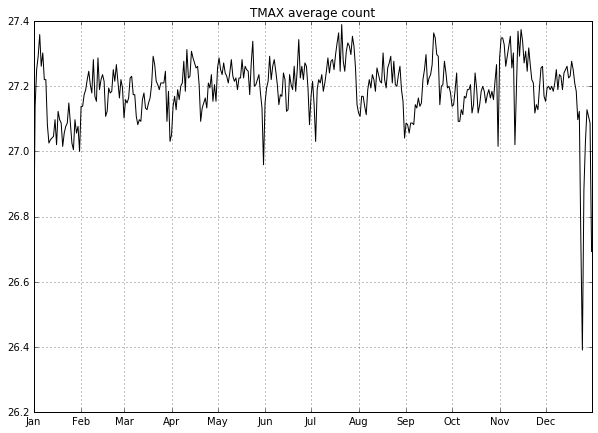

In [11]:
#plotting the average count per day for all stations: the same dip pattern exists#
stations_count_mean=m_df['TMAX'].groupby('station').count().ix[:,2:].mean(axis=0)
YearlyPlots(stations_count_mean,ttl='TMAX average count',yl='',xl='',y=None,x=None,size=(10,7), c='black')

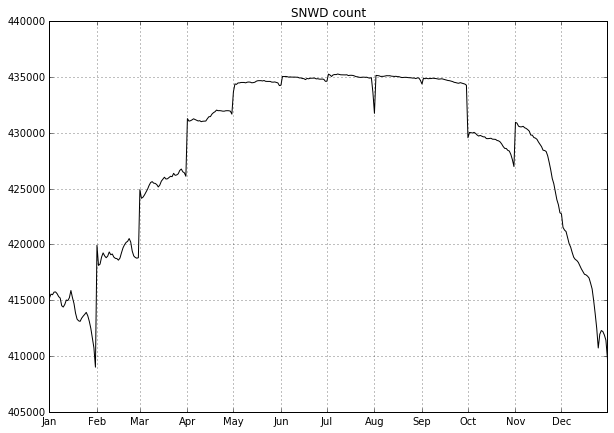

In [14]:
#plotting the average snow day count per day for all stations
YearlyPlots(STAT['SNWD']['NE'],ttl='SNWD count',yl='',xl='',y=None,x=None,size=(10,7), c='black')

### Plot the following 3 plots for each measurement:

1. The percentage of variance explained by top-k eigen vectors for k between 1 to 9
2. Plot of mean and mean $\pm$ std
3. Plot of top 3 eigenvectors

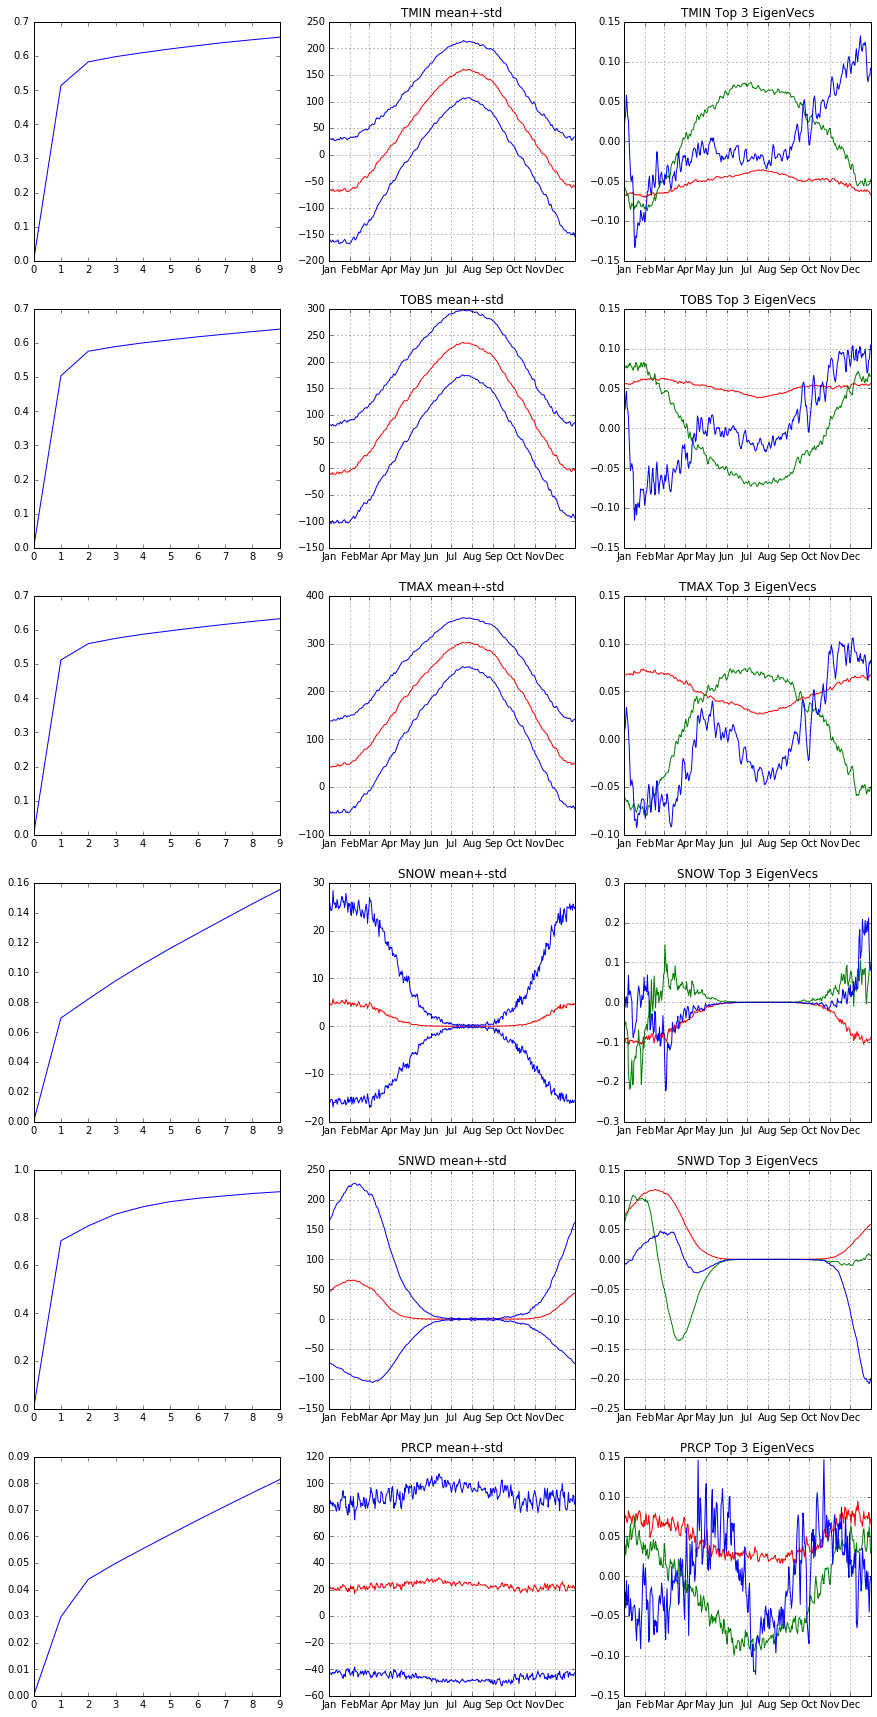

In [13]:
figure(figsize=(15,30))
offset=1
for meas in STAT.keys():
    subplot(6,3,offset)
    offset+=1
    ## Your code for percentage of variance explained
    perc_var_exp=[]
    eig_top_10=sorted(STAT[meas]['eigval'], reverse=True)[0:10]
    for i in range(10):
        perc_var_exp.append(sum(eig_top_10[:i]))
    plt.plot(perc_var_exp/STAT[meas]['eigval'].sum())
    subplot(6,3,offset)
    offset+=1
    ## Your code for mean and mean +- std
    YearlyPlots(STAT[meas]['Mean'],ttl=meas+' mean+-std',yl='',xl='',y=None,x=None,size=(10,7), c='red')
    YearlyPlots(STAT[meas]['Mean']+sqrt(STAT[meas]['Var']),ttl=meas+' mean+-std',yl='',xl='',y=None,x=None,size=(10,7), c='blue')
    YearlyPlots(STAT[meas]['Mean']-sqrt(STAT[meas]['Var']),ttl=meas+' mean+-std',yl='',xl='',y=None,x=None,size=(10,7), c='blue')
    subplot(6,3,offset)
    offset+=1
    ## Your code for top-3 eigenvectors    
    YearlyPlots(STAT[meas]['eigvec'][:,0],ttl=meas+' Top 3 EigenVecs',yl='',xl='',y=None,x=None,size=(10,7), c='red')
    YearlyPlots(STAT[meas]['eigvec'][:,1],ttl=meas+' Top 3 EigenVecs',yl='',xl='',y=None,x=None,size=(10,7), c='green')
    YearlyPlots(STAT[meas]['eigvec'][:,2],ttl=meas+' Top 3 EigenVecs',yl='',xl='',y=None,x=None,size=(10,7), c='blue')